# Problem Understanding

A Topic Model can be defined as an unsupervised technique to discover topics across various text documents. These topics are abstract in nature, i.e., words 
which are related to each other form a topic. Similarly, there can be multiple topics in an individual document.

# Imports

In [18]:
import umap 
import nltk
import numpy as np 
import pandas as pd 
nltk.download('stopwords')
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords 
from sklearn.decomposition import TruncatedSVD 
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer 
stop_words = stopwords.words('english') 
pd.set_option("display.max_colwidth", 200)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Exploring Data

In [5]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes')) 
documents = dataset.data 
print(len(documents))
dataset.target_names

11314


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# Data Preprocessing

In [0]:
news_df = pd.DataFrame({'document':documents}) 
# remove everything except alphabets` 
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ") 
# remove short words 
news_df['clean_doc']=news_df['clean_doc'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3])) 
# make all text lowercase 
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [0]:
# tokenization 
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) 
# remove stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words]) 
# de-tokenization 
detokenized_doc = [] 
for i in range(len(news_df)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 
news_df['clean_doc'] = detokenized_doc

# Document-Term Matrix

In [14]:
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) 
X = vectorizer.fit_transform(news_df['clean_doc']) 
X.shape

(11314, 1000)

# Topic Modelling

In [16]:
# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122) 
svd_model.fit(X) 
len(svd_model.components_)

20

In [17]:
terms = vectorizer.get_feature_names() 
for i, comp in enumerate(svd_model.components_): 
    terms_comp = zip(terms, comp) 
    sorted_terms = sorted(terms_comp, key= lambda x:x[1],        
    reverse=True)[:7] 
    print("Topic "+str(i)+": ") 
    for t in sorted_terms: 
        print(t[0]) 
        print(" ")

Topic 0: 
like
 
know
 
people
 
think
 
good
 
time
 
thanks
 
Topic 1: 
thanks
 
windows
 
card
 
drive
 
mail
 
file
 
advance
 
Topic 2: 
game
 
team
 
year
 
games
 
season
 
players
 
good
 
Topic 3: 
drive
 
scsi
 
hard
 
disk
 
card
 
drives
 
problem
 
Topic 4: 
windows
 
file
 
window
 
files
 
program
 
using
 
problem
 
Topic 5: 
chip
 
government
 
mail
 
space
 
information
 
encryption
 
data
 
Topic 6: 
like
 
bike
 
chip
 
know
 
sounds
 
looks
 
look
 
Topic 7: 
card
 
video
 
sale
 
monitor
 
offer
 
price
 
jesus
 
Topic 8: 
know
 
card
 
chip
 
government
 
video
 
people
 
clipper
 
Topic 9: 
good
 
know
 
time
 
bike
 
jesus
 
problem
 
work
 
Topic 10: 
think
 
chip
 
good
 
thanks
 
clipper
 
encryption
 
need
 
Topic 11: 
thanks
 
good
 
right
 
bike
 
problem
 
people
 
time
 
Topic 12: 
good
 
people
 
windows
 
know
 
file
 
sale
 
files
 
Topic 13: 
space
 
think
 
know
 
nasa
 
problem
 
year
 
israel
 
Topic 14: 
space
 
good
 
card
 
people
 
time
 
nas

# Topic Visualization

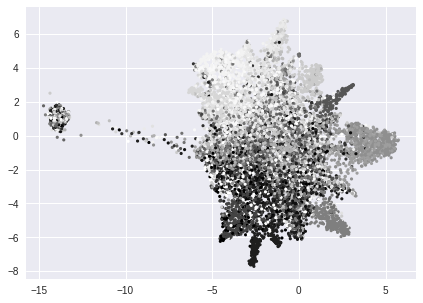

In [19]:
X_topics = svd_model.fit_transform(X) 
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics) 
plt.figure(figsize=(7,5)) 
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target, 
s = 10, # size 
edgecolor='none' ) 
plt.show()

# Conclusion

As you can see above, the result is quite beautiful. Each dot represents a document and the colours represent the 20 newsgroups. Our LSA model seems to have done a good job.